<a href="https://colab.research.google.com/github/saadkarim165/ObjectDetectionProject/blob/main/ObjectDetection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%%markdown
#Object Detection Model

#Object Detection Model


In [32]:
%%markdown 
## Importing Dependencies

## Importing Dependencies


In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
import shutil as sh

from tqdm.auto import tqdm
from PIL import Image
from google.colab.patches import cv2_imshow

In [34]:
!unzip /Vehicles-OpenImages.v1-416x416.yolokeras.zip

Archive:  /Vehicles-OpenImages.v1-416x416.yolokeras.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
 extracting: README.dataset.txt      
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.roboflow.txt     
replace test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
replace test/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [35]:
train_dir = "/content/train"
test_dir = "/content/test"

print('Image(train): ', len(os.listdir(train_dir)))
print('Image(test): ', len(os.listdir(test_dir)))

Image(train):  880
Image(test):  128


In [60]:
data = pd.read_csv("/content/train/_annotations.txt",header=None,delimiter='\t')
max_length=0
for i,j in data.iterrows():
  if len(j[0].split(' '))>max_length:
    max_length=len(j[0].split(' '))
  else:
    continue
print(max_length)

10


In [61]:
# data=data.rename(columns={0: 'ImageName', 1: 'xmin',2: 'ymin',3: 'xmax',4: 'ymax',5: 'xmin2',6: 'ymin2',7: 'xmax2',8: 'ymax2'})

In [62]:
# data.iloc[217][0]

In [63]:
print(data.shape)
data.nunique()

(878, 1)


0    878
dtype: int64

(416, 416, 3)


True

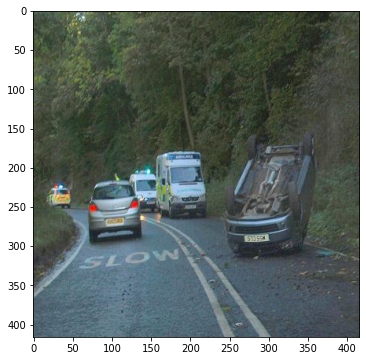

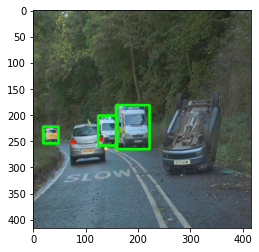

In [64]:
IMAGE_SHAPE = 0
points={}
points1={}
rand = 217
random_row = data.iloc[rand]
rand_list= random_row[0]
image = plt.imread(train_dir +'/'+ rand_list.split(' ')[0])
plt.figure(figsize=(8,6))
plt.imshow(image)
IMAGE_SHAPE = image.shape
print(image.shape)
list_values=rand_list.split(' ')
for i in range(1,len(list_values)):
  pnts=list_values[i].split(',')[:4]
  # print(pnts)
  points["point{0}".format(i)] = int(pnts[0]), int(pnts[1])
  points1["point{0}".format(i)] = int(pnts[2]), int(pnts[3])
# print(points)
for i,j in enumerate(points):
  cv2.rectangle(image,points[j], points1[j], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point2'], points1['point2'], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point3'], points1['point3'], color=(0, 255, 0), thickness=3)
plt.figure()
plt.imshow(image)
points['point2']==(124,201)

In [65]:
points

{'point1': (19, 222), 'point2': (124, 201), 'point3': (158, 181)}

(416, 416, 3)
(416, 416, 3)
(416, 416, 3)
(416, 416, 3)


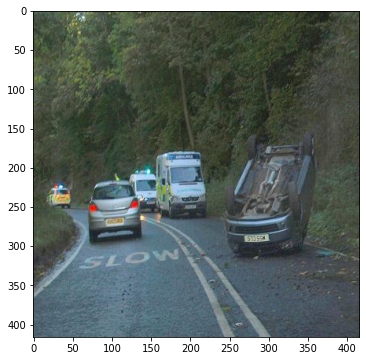

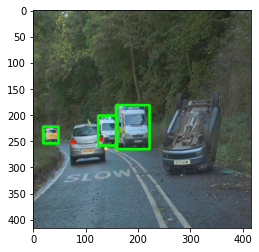

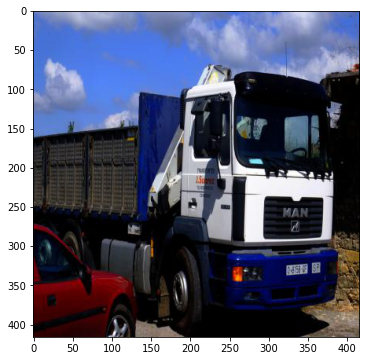

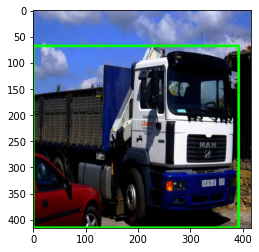

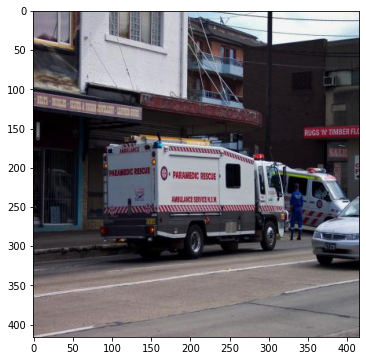

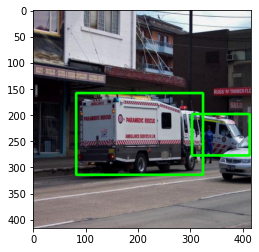

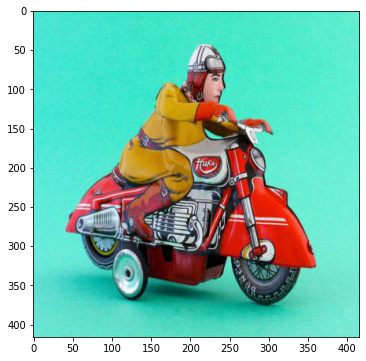

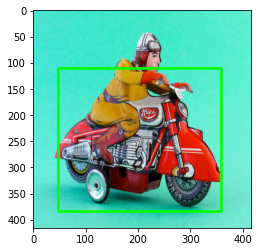

In [66]:
# IMAGE_SHAPE = 0
# for i in range(4):
#     rand = np.random.randint(0, data.shape[0])
#     random_row = data.iloc[rand]
#     image = plt.imread(train_dir +'/'+ random_row[0])
#     plt.figure()
#     plt.imshow(image)
#     IMAGE_SHAPE = image.shape
#     print(image.shape)
#     print('Name,xmin,ymin,xmax,ymax:',random_row)
#     point1 = (int(random_row[1]), int(random_row[2]))
#     point2 = (int(random_row[3]), int(random_row[4]))
#     cv2.rectangle(image, point1, point2, color=(0, 255, 0), thickness=3)
#     plt.figure()
#     plt.imshow(image)

IMAGE_SHAPE = 0
for i in range(4):
  points={}
  points1={}
  rand = np.random.randint(0, data.shape[0])
  random_row = data.iloc[rand]
  rand_list= random_row[0]
  image = plt.imread(train_dir +'/'+ rand_list.split(' ')[0])
  plt.figure(figsize=(8,6))
  plt.imshow(image)
  IMAGE_SHAPE = image.shape
  print(image.shape)
  list_values=rand_list.split(' ')
  for i in range(1,len(list_values)):
    pnts=list_values[i].split(',')[:4]
  # print(pnts)
    points["point{0}".format(i)] = int(pnts[0]), int(pnts[1])
    points1["point{0}".format(i)] = int(pnts[2]), int(pnts[3])
# print(points)
  for i,j in enumerate(points):
    cv2.rectangle(image,points[j], points1[j], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point2'], points1['point2'], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point3'], points1['point3'], color=(0, 255, 0), thickness=3)
  plt.figure()
  plt.imshow(image)


In [67]:
# image = cv2.imread("/bdc6ddcd3b5129bb_jpg.rf.vGGKLMAv30Zlex9EOx9X.jpg")
# with open("/_annotations.txt", "r") as f:

#   lines = f.readlines()
#   print(lines)

# for line in lines_1:
#   x, y, w, h = (10,15,30,45) # Draw the box on the image
#   cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2) # Display the image with the annotations
# cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [68]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r ./yolov5/requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
data

,0
0,bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...
1,b61201eee8903342_jpg.rf.00edd486466508ba478ce7...
2,2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...
3,6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...
4,ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...
...,...
873,a37730f43629ed00_jpg.rf.b2NktvrYPF8IJunrKBQV.j...
874,552a0d9a0fc92dac_jpg.rf.c1d215d149e6deb7126925...
875,43f9dfb36618117e_jpg.rf.c374950b7a017b990d29dd...
876,ceaec0f3cdb104c0_jpg.rf.bbacf3d4ed5518a6d05cf1...


In [70]:
# data.loc[0]

In [71]:
data= data[0].str.split(' ', expand=True)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...,"41,163,155,303,1","143,136,416,350,1",None,None,None,None,None,None,None
1,b61201eee8903342_jpg.rf.00edd486466508ba478ce7...,"216,44,407,378,1","44,48,235,356,1",None,None,None,None,None,None,None
2,2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...,"42,128,162,247,2",None,None,None,None,None,None,None,None
3,6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...,"0,70,79,323,0","75,62,343,365,0","309,94,415,309,0",None,None,None,None,None,None
4,ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...,"37,58,397,390,2","242,20,332,76,2","329,38,369,83,2","361,35,415,202,2",None,None,None,None,None


In [72]:
# data.iloc[:,1:10].str.split(',', expand=True)

Image_col= data.iloc[:,0]
df= pd.DataFrame()
df= pd.concat([df,Image_col])
df.head()
for i in range(1,10):
  df1=data.iloc[:,i].str.split(',', expand=True)
  # print(df1.head())
  df1 = df1.rename(columns={
    0: 'x_min{0}'.format(i),
    1: 'y_min{0}'.format(i),
    2: 'x_max{0}'.format(i),
    3: 'y_max{0}'.format(i),
    4: 'class{0}'.format(i)
})
  df= pd.concat([df,df1],axis=1)

In [73]:
df.rename(columns={0:"Image Name"},inplace=True)

In [74]:
df.head()

,Image Name,x_min1,y_min1,x_max1,y_max1,class1,x_min2,y_min2,x_max2,y_max2,...,x_min8,y_min8,x_max8,y_max8,class8,x_min9,y_min9,x_max9,y_max9,class9
0,bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...,41,163,155,303,1,143,136,416,350,...,None,None,None,None,None,None,None,None,None,None
1,b61201eee8903342_jpg.rf.00edd486466508ba478ce7...,216,44,407,378,1,44,48,235,356,...,None,None,None,None,None,None,None,None,None,None
2,2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...,42,128,162,247,2,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...,0,70,79,323,0,75,62,343,365,...,None,None,None,None,None,None,None,None,None,None
4,ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...,37,58,397,390,2,242,20,332,76,...,None,None,None,None,None,None,None,None,None,None


In [75]:
df.fillna(0,inplace=True)
df.head()

,Image Name,x_min1,y_min1,x_max1,y_max1,class1,x_min2,y_min2,x_max2,y_max2,...,x_min8,y_min8,x_max8,y_max8,class8,x_min9,y_min9,x_max9,y_max9,class9
0,bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...,41,163,155,303,1,143,136,416,350,...,0,0,0,0,0,0,0,0,0,0
1,b61201eee8903342_jpg.rf.00edd486466508ba478ce7...,216,44,407,378,1,44,48,235,356,...,0,0,0,0,0,0,0,0,0,0
2,2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...,42,128,162,247,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...,0,70,79,323,0,75,62,343,365,...,0,0,0,0,0,0,0,0,0,0
4,ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...,37,58,397,390,2,242,20,332,76,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df=df.iloc[:,1:].astype('int32')
df.head()

,x_min1,y_min1,x_max1,y_max1,class1,x_min2,y_min2,x_max2,y_max2,class2,...,x_min8,y_min8,x_max8,y_max8,class8,x_min9,y_min9,x_max9,y_max9,class9
0,41,163,155,303,1,143,136,416,350,1,...,0,0,0,0,0,0,0,0,0,0
1,216,44,407,378,1,44,48,235,356,1,...,0,0,0,0,0,0,0,0,0,0
2,42,128,162,247,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,70,79,323,0,75,62,343,365,0,...,0,0,0,0,0,0,0,0,0,0
4,37,58,397,390,2,242,20,332,76,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
(df["x_max{0}".format(i)] + df["x_min{0}".format(i)])/2

In [81]:


im_h, im_w, num_chanels = IMAGE_SHAPE
for i in range(1,10):
  # x_center = "x_center{0}".format(str(i))
  # x_min    = "x_min{0}".format(str(i))
  # x_max    = "x_max{0}".format(str(i))
  # y_min    = "y_min{0}".format(str(i))
  # y_max    = "y_max{0}".format(str(i))
  # print(i)
  df["x_center{0}".format(i)] = (df["x_max{0}".format(i)] + df["x_min{0}".format(i)])/2
  df["y_center{0}".format(i)] = (df["y_max{0}".format(i)] + df["y_min{0}".format(i)])/2
  df["w{0}".format(i)] = df["x_max{0}".format(i)] - df["x_min{0}".format(i)]
  df["h{0}".format(i)] = df["y_max{0}".format(i)] - df["y_min{0}".format(i)]
  # df["classes"] = df["class{0}".format(i)]
  # #Normalizing the values with image height and width
  df["x_center{0}".format(i)] = df["x_center{0}".format(i)]/im_w
  df["w{0}".format(i)] = df["w{0}".format(i)]/im_w
  df["y_center{0}".format(i)] = df["y_center{0}".format(i)]/im_h
  df["h{0}".format(i)] = df["h{0}".format(i)]/im_h


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 82 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x_min1     878 non-null    int32  
 1   y_min1     878 non-null    int32  
 2   x_max1     878 non-null    int32  
 3   y_max1     878 non-null    int32  
 4   class1     878 non-null    int32  
 5   x_min2     878 non-null    int32  
 6   y_min2     878 non-null    int32  
 7   x_max2     878 non-null    int32  
 8   y_max2     878 non-null    int32  
 9   class2     878 non-null    int32  
 10  x_min3     878 non-null    int32  
 11  y_min3     878 non-null    int32  
 12  x_max3     878 non-null    int32  
 13  y_max3     878 non-null    int32  
 14  class3     878 non-null    int32  
 15  x_min4     878 non-null    int32  
 16  y_min4     878 non-null    int32  
 17  x_max4     878 non-null    int32  
 18  y_max4     878 non-null    int32  
 19  class4     878 non-null    int32  
 20  x_min5    

In [86]:
df.drop(['classes'],axis=1,inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 81 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x_min1     878 non-null    int32  
 1   y_min1     878 non-null    int32  
 2   x_max1     878 non-null    int32  
 3   y_max1     878 non-null    int32  
 4   class1     878 non-null    int32  
 5   x_min2     878 non-null    int32  
 6   y_min2     878 non-null    int32  
 7   x_max2     878 non-null    int32  
 8   y_max2     878 non-null    int32  
 9   class2     878 non-null    int32  
 10  x_min3     878 non-null    int32  
 11  y_min3     878 non-null    int32  
 12  x_max3     878 non-null    int32  
 13  y_max3     878 non-null    int32  
 14  class3     878 non-null    int32  
 15  x_min4     878 non-null    int32  
 16  y_min4     878 non-null    int32  
 17  x_max4     878 non-null    int32  
 18  y_max4     878 non-null    int32  
 19  class4     878 non-null    int32  
 20  x_min5    

In [94]:
df1= pd.concat([data[0],df],axis=1)
df1.rename(columns={0:'ImageName'},inplace=True)

In [95]:
df1.head()

,ImageName,x_min1,y_min1,x_max1,y_max1,class1,x_min2,y_min2,x_max2,y_max2,...,w7,h7,x_center8,y_center8,w8,h8,x_center9,y_center9,w9,h9
0,bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...,41,163,155,303,1,143,136,416,350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b61201eee8903342_jpg.rf.00edd486466508ba478ce7...,216,44,407,378,1,44,48,235,356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...,42,128,162,247,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...,0,70,79,323,0,75,62,343,365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...,37,58,397,390,2,242,20,332,76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
